# wow

In [1]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file

N = 4000

x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [(r, g, 150) for r, g, in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

output_notebook()

p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=.6, line_color=None)
show(p)

Loading BokehJS ...

# whoa

In [2]:
import networkx as nx

from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx, show

G = nx.karate_club_graph()

plot = Plot(width=800, height=800,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

show(plot)

# whoo

<IPython.core.display.Javascript object>


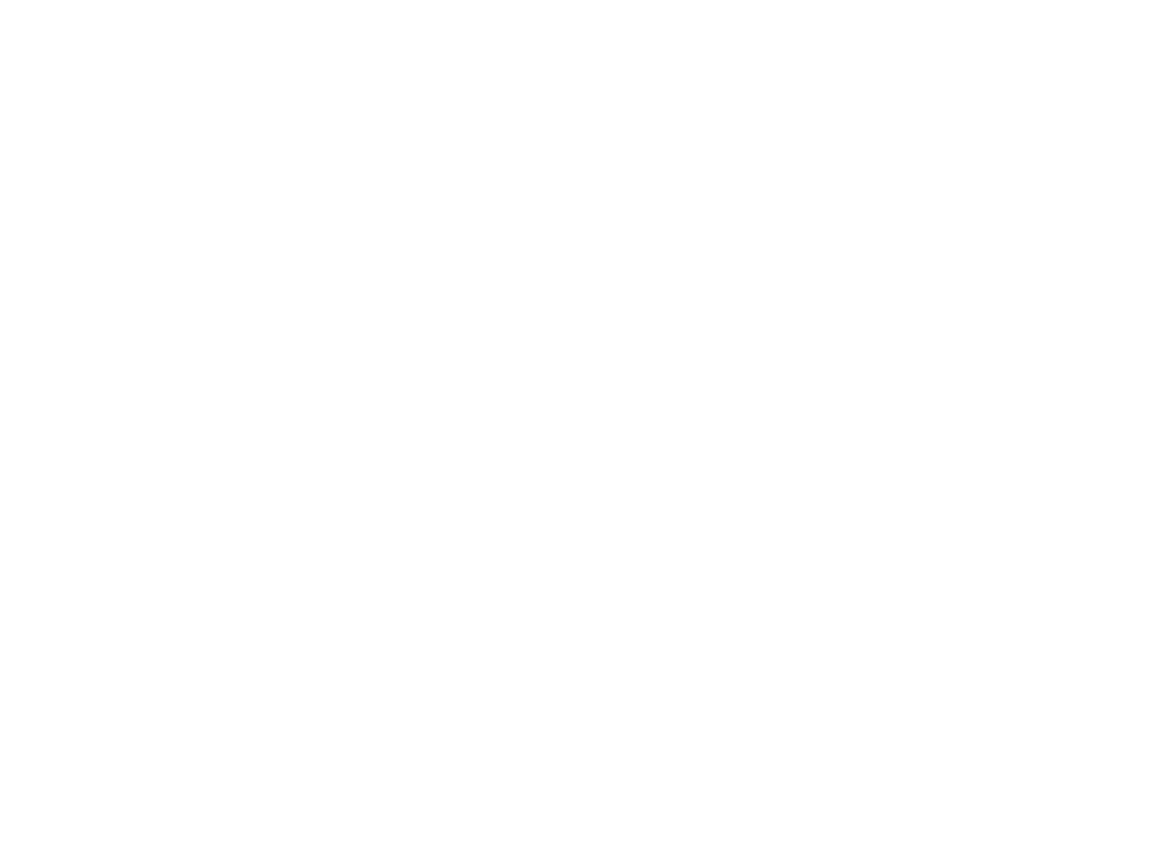

0

In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

# why

In [4]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt

button1 = widgets.Button(description="Yes")
button2 = widgets.Button(description="No")
out = widgets.Output()

buttons = widgets.VBox(children=[button1, button2])
all_widgets = widgets.HBox(children=[buttons, out])
display(all_widgets)

def logyes(b):
    print("yes")

def logno(b):
    print("no")

button1.on_click(logyes)
button2.on_click(logno)

with out:
    plt.figure(figsize=(3,3))
    plt.plot([1,2],[3,4])
    plt.show()

<IPython.core.display.Javascript object>


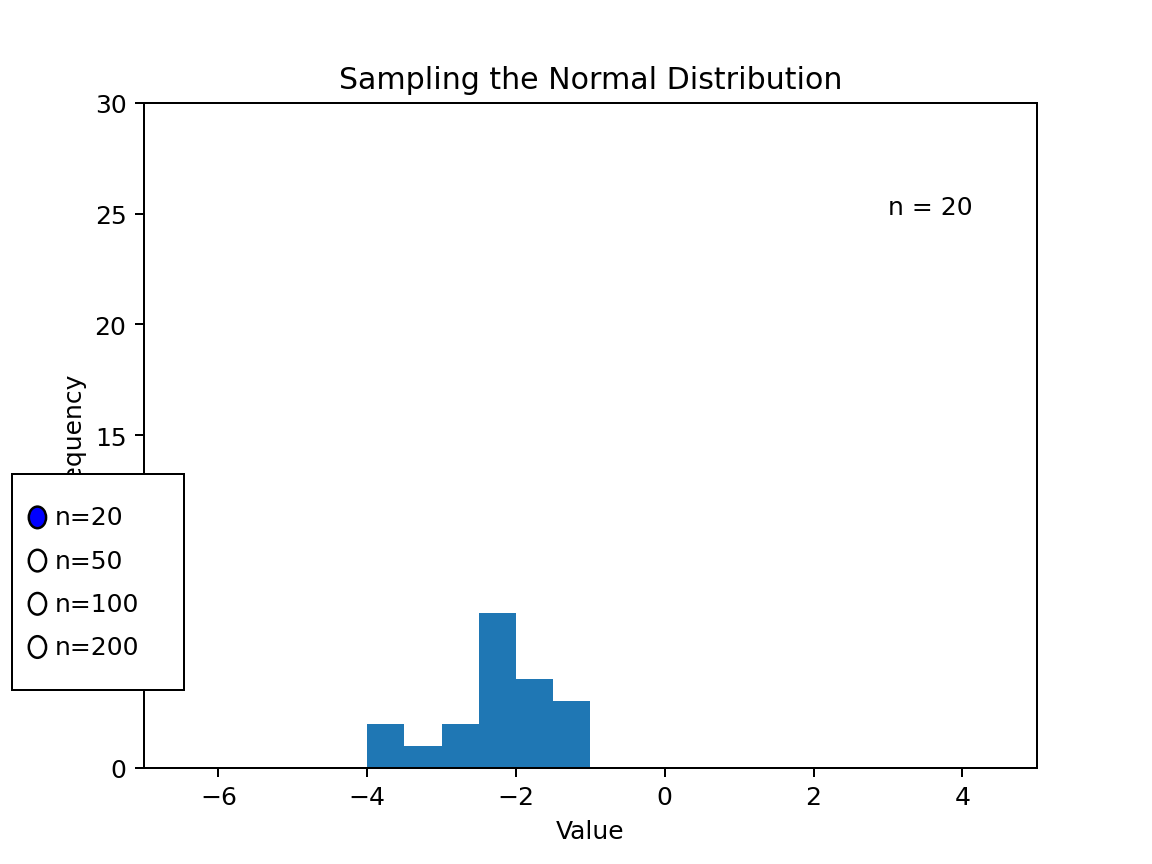

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
from matplotlib.animation import FuncAnimation
import numpy as np

n_max = 200
x_curr = np.random.normal(-2.5, 1, size=n_max)
bins = np.arange(-4, 4, 0.5)

def animate(i):
    ax.clear()
    ax.set_title('Sampling the Normal Distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    ax.annotate('n = {}'.format(i), [3, 25])
    ax.axis([-7, 5, 0, 30])
    ax.hist(x_curr[:i], bins=bins)


anis = []
def on_click(event):
    n = int(event[2:])

    for ani in anis:
        ani.event_source.stop()
        anis.remove(ani)
        del ani

    print(n)
    ani = FuncAnimation(fig, animate, frames=n, repeat=False)
    anis.append(ani)
    fig.canvas.draw_idle()

fig = plt.figure()
ax = fig.subplots()

rax = plt.axes([0.01, 0.2, 0.15, 0.25])
radio = RadioButtons(rax, ('n=20', 'n=50', 'n=100', 'n=200'))
radio.on_clicked(on_click)
animate(20)
plt.show()

# whee

In [6]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import AAPL
from bokeh.io import output_notebook

dates = np.array(AAPL['date'], dtype=np.datetime64)
source = ColumnDataSource(data=dict(date=dates, close=AAPL['adj_close']))

p = figure(height=300, width=800, tools="xpan", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[1500], dates[2500]))

p.line('date', 'close', source=source)
p.yaxis.axis_label = 'Price'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'close', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool

output_notebook()

show(column(p, select))

Loading BokehJS ...